In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

In [47]:
k = 4
s = -1/(k-1)*1
C_num = 3

In [33]:
file_data = 'bone_data_train_0610.csv'
data = pd.read_csv(file_data)
my_data = data.values

my_x = my_data[:,1:len(my_data)]
n = len(my_x[:,0])
x_dim = len(my_x[0,:])
print(x_dim)
file_data = 'bone_y_train_0610.csv'
data = pd.read_csv(file_data)
my_data = data.values

my_y = my_data[:,1] - 1 ##注意减一
my_y = my_y.reshape((len(my_y),1))

8


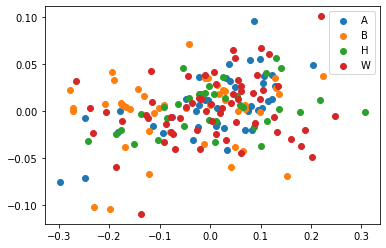

In [34]:
plt.scatter(my_x[my_y[:,0]==0,0], my_x[my_y[:,0]==0,1], label = 'A')
plt.scatter(my_x[my_y[:,0]==1,0], my_x[my_y[:,0]==1,1], label = 'B')
plt.scatter(my_x[my_y[:,0]==2,0], my_x[my_y[:,0]==2,1], label = 'H')
plt.scatter(my_x[my_y[:,0]==3,0], my_x[my_y[:,0]==3,1], label = 'W')
plt.legend()

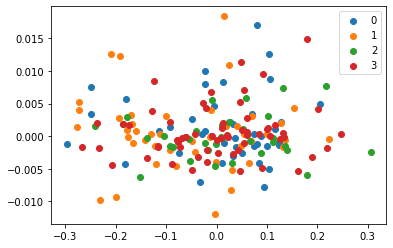

In [35]:
plt.scatter(my_x[my_y[:,0]==0,0], my_x[my_y[:,0]==0,2], label = '0')
plt.scatter(my_x[my_y[:,0]==1,0], my_x[my_y[:,0]==1,2], label = '1')
plt.scatter(my_x[my_y[:,0]==2,0], my_x[my_y[:,0]==2,2], label = '2')
plt.scatter(my_x[my_y[:,0]==3,0], my_x[my_y[:,0]==3,2], label = '3')
plt.legend()

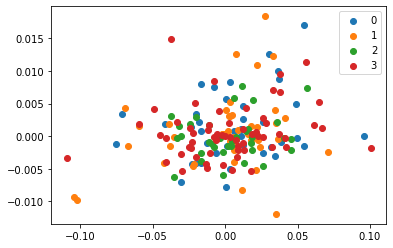

In [36]:
plt.scatter(my_x[my_y[:,0]==0,1], my_x[my_y[:,0]==0,2], label = '0')
plt.scatter(my_x[my_y[:,0]==1,1], my_x[my_y[:,0]==1,2], label = '1')
plt.scatter(my_x[my_y[:,0]==2,1], my_x[my_y[:,0]==2,2], label = '2')
plt.scatter(my_x[my_y[:,0]==3,1], my_x[my_y[:,0]==3,2], label = '3')
plt.legend()

In [37]:
label_sum = np.zeros((4,x_dim))
label_num = [0,0,0,0]
for i in range(n):
    i_label = my_y[i,0]
    label_num[i_label] += 1
    label_sum[i_label,:] += my_x[i,:]

## PMC

In [38]:
label_mean = np.zeros((4,x_dim))
for i in range(4):
    label_mean[i,:] = label_sum[i,:]/label_num[i]

## distance

In [39]:
def m_distance(x1,x2):
    return(np.sum(np.square(x1-x2)))

## train

In [40]:
correct_num = 0
esti_mat = np.zeros(n)
for i in range(n):
    esti = np.zeros(4)
    for j in range(4):
        esti[j] = m_distance(my_x[i,:],label_mean[j,:])
    esti_mat[i] = esti.argmin()
    if esti.argmin() == my_y[i]:
        correct_num += 1

In [41]:
cf_mat = np.zeros((k,k))
for i in range(n):
    cf_mat[int(my_y[i]),int(esti_mat[i])] += 1
#print(cf_mat)
print("iter:{},准确率:{}".format(0, correct_num/n))
print(cf_mat)


iter:0,准确率:0.2896174863387978
[[10. 11. 16.  5.]
 [ 6. 24. 13.  2.]
 [ 5. 12. 13.  5.]
 [12. 22. 21.  6.]]


## test

In [42]:
file_data = 'bone_data_test_0610.csv'
data = pd.read_csv(file_data)
my_data = data.values

my_x_test = my_data[:,1:len(my_data)]
n_test = len(my_x_test[:,0])
x_dim = len(my_x_test[0,:])

file_data = 'bone_y_test_0610.csv'
data = pd.read_csv(file_data)
my_data = data.values

my_y_test = my_data[:,1] - 1 ##注意减一
my_y_test = my_y_test.reshape((len(my_y_test),1))

In [43]:
correct_num = 0
esti_mat_test = np.zeros(n_test)
for i in range(n_test):
    esti = np.zeros(4)
    for j in range(4):
        esti[j] = m_distance(my_x_test[i,:],label_mean[j,:])
        
    esti_mat_test[i] = esti.argmin()
    if esti.argmin() == my_y_test[i]:
        correct_num += 1
        
cf_mat = np.zeros((k,k))
for i in range(n_test):
    cf_mat[int(my_y_test[i]),int(esti_mat_test[i])] += 1
#print(cf_mat)
print("iter:{},准确率:{}".format(0, correct_num/n_test))
print(cf_mat)

iter:0,准确率:0.32989690721649484
[[ 6.  7. 10.  6.]
 [ 3. 14.  4.  1.]
 [ 4.  4.  8.  1.]
 [ 4. 11. 10.  4.]]


In [44]:
def m_distance(x1,x2,cov_m):
    return( np.dot(np.dot( (x1 - x2).T, np.linalg.inv(cov_m) ), (x1 - x2)) )

In [45]:
for label in range(1):
    
    file_data = 'bone_data_train_0610.csv'
    data = pd.read_csv(file_data)
    my_data = data.values

    my_x = my_data[:,2:(len(my_data[0,:]))]
    print(my_x[0,:])
    n = len(my_x[:,0])
    x_dim = len(my_x[0,:])
    print(n)
    file_data = 'bone_y_train_0610.csv'
    data = pd.read_csv(file_data)
    my_data = data.values

    my_y = my_data[:,1] - 1 ##注意减一
    my_y = my_y.reshape((len(my_y),1))
    
    file_data = 'bone_data_test_0610.csv'
    data = pd.read_csv(file_data)
    my_data = data.values
    
    my_x_test = my_data[:,2:(len(my_data[0,:]))]
    n_test = len(my_x_test[:,0])
    x_dim = len(my_x_test[0,:])
    print(n_test)
    file_data = 'bone_y_test_0610.csv'
    data = pd.read_csv(file_data)
    my_data = data.values

    my_y_test = my_data[:,1] - 1 ##注意减一
    my_y_test = my_y_test.reshape((len(my_y_test),1))
    

    label_sum = np.zeros((k,x_dim))
    label_num = np.zeros(k)
    label_cov = np.zeros((k,x_dim,x_dim)) ###
    
    for i in range(n):
        i_label = my_y[i,0]
        label_num[i_label] += 1
        label_sum[i_label,:] += my_x[i,:]
    
    label_mean = np.zeros((k,x_dim))
    for i in range(k):
        label_mean[i,:] = label_sum[i,:]/label_num[i]
        label_cov[i,:] = np.cov( ((my_x[np.where(my_y[:,0] == i),:])[0,:]) , rowvar=False) ###
        
    
    correct_num = 0
    esti_mat = np.zeros(n)
    for i in range(n):
        esti = np.zeros(k)
        for j in range(k):
            esti[j] = m_distance(my_x[i,:],label_mean[j,:], label_cov[j,:]) - np.log(label_num[j]) + 0.5*np.log(np.linalg.det(label_cov[j,:]))###
        esti_mat[i] = esti.argmin()
        if esti.argmin() == my_y[i]:
            correct_num += 1
    print(correct_num/n)
    

    correct_num = 0
    esti_mat_test = np.zeros(n_test)
    for i in range(n_test):
        esti = np.zeros(k)
        for j in range(k):
            esti[j] = m_distance(my_x_test[i,:],label_mean[j,:], label_cov[j,:]) - np.log(label_num[j]) + 0.5*np.log(np.linalg.det(label_cov[j,:])) ###

        esti_mat_test[i] = esti.argmin()
        if esti.argmin() == my_y_test[i]:
            correct_num += 1

    cf_mat = np.zeros((k,k))
    for i in range(n_test):
        cf_mat[int(my_y_test[i]),int(esti_mat_test[i])] += 1
        
    print(correct_num/n_test)
    print(cf_mat)


[-4.52661449e-02  1.75711019e-04 -1.99808592e-06  3.63236342e-07
  3.89375993e-11  8.37150644e-11  1.00000000e-05]
183
97
0.4371584699453552
0.25773195876288657
[[ 5.  5.  8. 11.]
 [ 1.  5.  3. 13.]
 [ 1.  3.  5.  8.]
 [ 4. 11.  4. 10.]]


### LM2FC

In [50]:
my_omega = np.random.randn(x_dim,k)
my_b = np.random.randn(k)
C_num = 0.5
correct_num = 0
iter_num = 20

train_s_cr = []
test_s_cr = []

for i in range(n):
    esti = np.dot(my_x[i,:], my_omega) + my_b
    if esti.argmax() == my_y[i]:
        correct_num += 1
print("初始准确率:",correct_num/n)

for iter in range(iter_num):
    my_beta = np.zeros((n,k))
    ##### beta
    for i in range(n):
        pred_iter = (np.dot(my_x[i,:], my_omega) + my_b)
        pred_copy = pred_iter.copy()
        pred_iter[int(my_y[i])] = -float('inf')
        j = pred_iter.argmax()

        if((pred_copy[int(my_y[i])] - pred_copy[j]) < s):
            my_beta[i,j] = C_num
    
    ##### function1
    my_alpha = cp.Variable((n,k))
    obj_function = 0
    
    s1 = 0
    for j in range(k):
        s1_1 = 0
        s1_2 = 0
        for i in range(n):
            if my_y[i] == j:
                for j2 in range(k):
                    if j2 != my_y[i]:
                        s1_1 += (my_alpha[i,j2] - my_beta[i,j2]) *  my_x[i,:]

            if my_y[i] != j:
                s1_2 += (my_alpha[i,j] - my_beta[i,j]) *  my_x[i,:]

        s1 += cp.sum_squares(s1_1 - s1_2)
        
    s2 = 0
    for i in range(n):
        for j2 in range(k):
            if j2 != my_y[i]:
                s2 += my_alpha[i,j2]
                
    obj_function = 0.5 * s1 - s2
    
    ##### constrains1
    constrains = []
    for j in range(k):
        s1_1 = 0
        s1_2 = 0
        for i in range(n):
            if my_y[i] == j:
                for j2 in range(k):
                    if j2 != my_y[i]:
                        s1_1 += (my_alpha[i,j2] - my_beta[i,j2])

            if my_y[i] != j:
                s1_2 += (my_alpha[i,j] - my_beta[i,j])

        constrains += [(s1_1 - s1_2) == 0]

    for i in range(n):
        s1 = 0
        for j in range(k):
            if j != my_y[i]:
                s1 += my_alpha[i,j]
                constrains += [s1 >= 0]
                constrains += [s1 <= C_num]

    for i in range(n):
        for j in range(k):
            if j != my_y[i]:
                constrains += [my_alpha[i,j] >= 0]
                
    prob = cp.Problem(cp.Minimize(obj_function), constrains)
    prob.solve()
    
    ##### calculate omega
    for j in range(k):
        s1_1 = 0
        s1_2 = 0
        for i in range(n):
            if my_y[i] == j:
                for j2 in range(k):
                    if j2 != my_y[i]:
                        s1_1 += (my_alpha.value[i,j2] - my_beta[i,j2]) *  my_x[i,:]

            if my_y[i] != j:
                s1_2 += (my_alpha.value[i,j2] - my_beta[i,j2]) *  my_x[i,:]

        my_omega[:,j] = s1_1 - s1_2
        
    #print(my_omega)
    
    #####function2
    my_eta = cp.Variable(n)
    my_b = cp.Variable(k)
    
    obj_function_2 = 0
    s1 = 0
    for j in range(k):
        s1_1 = 0
        s1_2 = 0
        for i in range(n):
            if my_y[i] == j:
                for j2 in range(k):
                    if j2 != my_y[i]:
                        s1_1 += my_beta[i,j2]

            if my_y[i] != j:
                s1_2 += my_beta[i,j2]

        s1 += (s1_1 - s1_2) * my_b[j]

    obj_function_2 = C_num * cp.sum(my_eta) + s1
    
    ##### constrains2
    
    constrains_2 = []
    f_sim = np.dot(my_x, my_omega)

    for i in range(n):
        constrains_2 += [my_eta[i] >= 0]

    for i in range(n):
        for j in range(k):
            if j != my_y[i]:
                constrains_2 += [my_eta[i] >= (1 - (f_sim[i,int(my_y[i])] + my_b[int(my_y[i])]) + f_sim[i,j] + my_b[j])]

    constrains_2 += [cp.sum(my_b) == 0]
    
    prob_2 = cp.Problem(cp.Minimize(obj_function_2), constrains_2)
    
    prob_2.solve()
    my_b = my_b.value
    #print(my_b)
    
    ### train set correct-ratio ###
    
    correct_num = 0
    esti_mat = np.zeros(n)
    for i in range(n):
        esti = np.dot(my_x[i,:], my_omega) + my_b
        esti_mat[i] = esti.argmax()
        if esti.argmax() == my_y[i]:
            correct_num += 1
    #print(correct_num/n)
    
    cf_mat = np.zeros((k,k))
    for i in range(n):
        cf_mat[int(my_y[i]),int(esti_mat[i])] += 1
    #print(cf_mat)
    print("iter:{},准确率:{}".format(iter, correct_num/n))
    print(cf_mat)
    train_s_cr.append(correct_num/n)
    
    
    ### test set correct-ratio ###
    correct_num = 0
    esti_mat_test = np.zeros(n_test)
    for i in range(n_test):
        esti = np.dot(my_x_test[i,:], my_omega) + my_b
        esti_mat_test[i] = esti.argmax()
        if esti.argmax() == my_y_test[i]:
            correct_num += 1
    #print(correct_num/n)

    cf_mat = np.zeros((k,k))
    for i in range(n_test):
        cf_mat[int(my_y_test[i]),int(esti_mat_test[i])] += 1
    #print(cf_mat)
    print("准确率:{}".format(correct_num/n_test))
    print(cf_mat)
    test_s_cr.append(correct_num/n_test)

初始准确率: 0.22950819672131148
iter:0,准确率:0.3114754098360656
[[20.  4.  5. 13.]
 [14. 14.  8.  9.]
 [17.  4.  8.  6.]
 [31.  7.  8. 15.]]
准确率:0.20618556701030927
[[10.  5.  4. 10.]
 [14.  3.  0.  5.]
 [ 9.  2.  3.  3.]
 [17.  5.  3.  4.]]
iter:1,准确率:0.26229508196721313
[[13. 13.  0. 16.]
 [15. 11.  2. 17.]
 [ 8.  9.  3. 15.]
 [18. 20.  2. 21.]]
准确率:0.36082474226804123
[[13.  4.  0. 12.]
 [ 5. 11.  0.  6.]
 [ 5.  4.  0.  8.]
 [ 4. 10.  4. 11.]]
iter:2,准确率:0.26229508196721313
[[13. 13.  0. 16.]
 [15. 11.  2. 17.]
 [ 8.  9.  3. 15.]
 [18. 20.  2. 21.]]
准确率:0.36082474226804123
[[13.  4.  0. 12.]
 [ 5. 11.  0.  6.]
 [ 5.  4.  0.  8.]
 [ 4. 10.  4. 11.]]
iter:3,准确率:0.26229508196721313
[[13. 13.  0. 16.]
 [15. 11.  2. 17.]
 [ 8.  9.  3. 15.]
 [18. 20.  2. 21.]]
准确率:0.36082474226804123
[[13.  4.  0. 12.]
 [ 5. 11.  0.  6.]
 [ 5.  4.  0.  8.]
 [ 4. 10.  4. 11.]]
iter:4,准确率:0.26229508196721313
[[13. 13.  0. 16.]
 [15. 11.  2. 17.]
 [ 8.  9.  3. 15.]
 [18. 20.  2. 21.]]
准确率:0.36082474226804123
[[13. 

In [ ]:
x_line = np.linspace(1,iter_num,iter_num)
plt.plot(x_line, train_s_cr)
plt.plot(x_line, test_s_cr)

plt.legend(['train_s_cr','test_s_cr'])
plt.show()